In [1]:
#import the required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import random
%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
num_lines = sum(1 for i in open("application_data.csv")) #read the number of lines in pandas
size = num_lines//2
random.seed(10)
skip_id = random.sample(range(1, num_lines), num_lines-size)
application_data = pd.read_csv("application_data.csv", skiprows = skip_id)
num_lines = sum(1 for i in open("previous_application.csv"))
size = num_lines//2
random.seed(10)
skip_id = random.sample(range(1, num_lines), num_lines-size)
pre_application = pd.read_csv("previous_application.csv", skiprows = skip_id) #read the previous application in pandas

# application data analysis

In [3]:
application_data.shape #read the shape of application data

(153755, 122)

In [4]:
#print the percentage of nan value in application data into float type
application_data.isnull().sum(axis=0).sort_values()/len(application_data.index)*100 

SK_ID_CURR                       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
WEEKDAY_APPR_PROCESS_START       0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

In [5]:
#Drop the columns 'HOUSETYPE_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','ENTRANCES_MEDI','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','WALLSMATERIAL_MODE','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','EXT_SOURCE_1','BASEMENTAREA_MODE','BASEMENTAREA_AVG','BASEMENTAREA_MEDI','LANDAREA_MEDI','LANDAREA_AVG','LANDAREA_MODE','OWN_CAR_AGE','YEARS_BUILD_MODE','YEARS_BUILD_AVG','YEARS_BUILD_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE','COMMONAREA_MODE','COMMONAREA_AVG','COMMONAREA_MEDI' as there percentage of null value is more than 50
application_data.drop(['HOUSETYPE_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','ENTRANCES_MEDI','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','WALLSMATERIAL_MODE','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','EXT_SOURCE_1','BASEMENTAREA_MODE','BASEMENTAREA_AVG','BASEMENTAREA_MEDI','LANDAREA_MEDI','LANDAREA_AVG','LANDAREA_MODE','OWN_CAR_AGE','YEARS_BUILD_MODE','YEARS_BUILD_AVG','YEARS_BUILD_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE','COMMONAREA_MODE','COMMONAREA_AVG','COMMONAREA_MEDI'],axis=1,inplace=True)

In [6]:
#print the percentage of the nan application data after droping the columes
application_data.isnull().sum(axis=0).sort_values()/len(application_data.index)*100

SK_ID_CURR                       0.000000
WEEKDAY_APPR_PROCESS_START       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

In [7]:
#print the data type
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    153755 non-null  int64  
 1   TARGET                        153755 non-null  int64  
 2   NAME_CONTRACT_TYPE            153755 non-null  object 
 3   CODE_GENDER                   153755 non-null  object 
 4   FLAG_OWN_CAR                  153755 non-null  object 
 5   FLAG_OWN_REALTY               153755 non-null  object 
 6   CNT_CHILDREN                  153755 non-null  int64  
 7   AMT_INCOME_TOTAL              153755 non-null  float64
 8   AMT_CREDIT                    153755 non-null  float64
 9   AMT_ANNUITY                   153748 non-null  float64
 10  AMT_GOODS_PRICE               153610 non-null  float64
 11  NAME_TYPE_SUITE               153099 non-null  object 
 12  NAME_INCOME_TYPE              153755 non-nul

In [8]:
#print the unique application data into decending order
application_data.nunique().sort_values(ascending=False)

SK_ID_CURR                      153755
EXT_SOURCE_2                     85833
DAYS_BIRTH                       17260
DAYS_REGISTRATION                14812
AMT_ANNUITY                      11961
DAYS_EMPLOYED                    10918
DAYS_ID_PUBLISH                   6066
AMT_CREDIT                        4680
TOTALAREA_MODE                    4678
DAYS_LAST_PHONE_CHANGE            3661
AMT_INCOME_TOTAL                  1546
EXT_SOURCE_3                       789
AMT_GOODS_PRICE                    723
FLOORSMAX_AVG                      329
YEARS_BEGINEXPLUATATION_AVG        236
YEARS_BEGINEXPLUATATION_MEDI       213
YEARS_BEGINEXPLUATATION_MODE       194
REGION_POPULATION_RELATIVE          81
ORGANIZATION_TYPE                   58
FLOORSMAX_MEDI                      48
OBS_30_CNT_SOCIAL_CIRCLE            31
OBS_60_CNT_SOCIAL_CIRCLE            30
FLOORSMAX_MODE                      25
HOUR_APPR_PROCESS_START             24
AMT_REQ_CREDIT_BUREAU_YEAR          23
AMT_REQ_CREDIT_BUREAU_MON

In [9]:
#making the columes object type for which the uniqueness is less
list_Objects=['OBS_30_CNT_SOCIAL_CIRCLE','REG_REGION_NOT_LIVE_REGION','OBS_60_CNT_SOCIAL_CIRCLE','HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','OCCUPATION_TYPE','CNT_FAM_MEMBERS','CNT_CHILDREN','AMT_REQ_CREDIT_BUREAU_QRT','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','NAME_INCOME_TYPE','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','CODE_GENDER','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','NAME_CONTRACT_TYPE','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','TARGET','FLAG_DOCUMENT_19','FLAG_DOCUMENT_18','FLAG_DOCUMENT_21','FLAG_WORK_PHONE','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_DOCUMENT_20','FLAG_EMP_PHONE','FLAG_EMAIL','FLAG_CONT_MOBILE','FLAG_DOCUMENT_13','FLAG_DOCUMENT_5','EMERGENCYSTATE_MODE','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_14','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_PHONE','FLAG_DOCUMENT_2','FLAG_MOBIL','FLAG_DOCUMENT_12']
for feature in list_Objects:
    application_data.loc[:, feature] = application_data.loc[:, feature].astype(object)

In [10]:
#checking the application data type
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    153755 non-null  int64  
 1   TARGET                        153755 non-null  object 
 2   NAME_CONTRACT_TYPE            153755 non-null  object 
 3   CODE_GENDER                   153755 non-null  object 
 4   FLAG_OWN_CAR                  153755 non-null  object 
 5   FLAG_OWN_REALTY               153755 non-null  object 
 6   CNT_CHILDREN                  153755 non-null  object 
 7   AMT_INCOME_TOTAL              153755 non-null  float64
 8   AMT_CREDIT                    153755 non-null  float64
 9   AMT_ANNUITY                   153748 non-null  float64
 10  AMT_GOODS_PRICE               153610 non-null  float64
 11  NAME_TYPE_SUITE               153099 non-null  object 
 12  NAME_INCOME_TYPE              153755 non-nul

In [11]:
# making the numerical data type correction whether it is int or float and takig absolute value
for feature in application_data.columns: 
    if application_data[feature].dtype != 'object': 
        application_data.loc[:, feature] = pd.to_numeric(application_data[feature], errors = 'coerce')
        application_data[feature] = application_data[feature].abs()
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    153755 non-null  int64  
 1   TARGET                        153755 non-null  object 
 2   NAME_CONTRACT_TYPE            153755 non-null  object 
 3   CODE_GENDER                   153755 non-null  object 
 4   FLAG_OWN_CAR                  153755 non-null  object 
 5   FLAG_OWN_REALTY               153755 non-null  object 
 6   CNT_CHILDREN                  153755 non-null  object 
 7   AMT_INCOME_TOTAL              153755 non-null  float64
 8   AMT_CREDIT                    153755 non-null  float64
 9   AMT_ANNUITY                   153748 non-null  float64
 10  AMT_GOODS_PRICE               153610 non-null  float64
 11  NAME_TYPE_SUITE               153099 non-null  object 
 12  NAME_INCOME_TYPE              153755 non-nul

In [12]:
#describe the feature of application data numerical column
for feature in ['AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG']:
        print(application_data[feature].median())
        print(application_data[feature].describe())

24939.0
count    153748.000000
mean      27132.204373
std       14460.167565
min        1980.000000
25%       16546.500000
50%       24939.000000
75%       34646.625000
max      230161.500000
Name: AMT_ANNUITY, dtype: float64
450000.0
count    1.536100e+05
mean     5.387578e+05
std      3.691975e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
0.5659936562921726
count    1.534260e+05
mean     5.142126e-01
std      1.911444e-01
min      8.173617e-08
25%      3.924509e-01
50%      5.659937e-01
75%      6.634316e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
0.5370699579791587
count    123417.000000
mean          0.511472
std           0.194700
min           0.000527
25%           0.370650
50%           0.537070
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64
0.9816
count    78757.000000
mean         0.977647
std          0.059598
min       

### 5 point summery analysis for numerical column
* AMT_ANNUITY the distribution is not symetric change it with median value the NaN values 24939.0
* AMT_GOODS_PRICE the distribution is symetric change it with Mean value the NaN values 5.387578e+05
* EXT_SOURCE_2 the distribution is more or less symetric change it with Mean value the NaN values 5.142126e-01
* EXT_SOURCE_3 the distribution is more or less symetric change it with Mean value the NaN values 0.511472
* YEARS_BEGINEXPLUATATION_AVG the distribution is more or less symetric change it with Mean value the NaN values 0.977647
* FLOORSMAX_AVG the distribution is not symetric change it with median value the NaN values 0.1667

In [13]:
#calculate mode of the application data
for feature in ['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT']: # Loop through all columns in the dataframe
        print(application_data[feature].mode())

0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object
0    0
dtype: object


### change the above mention categorical column NaN value with mode value 0

#### Plot the Numerical values of univarient analysis

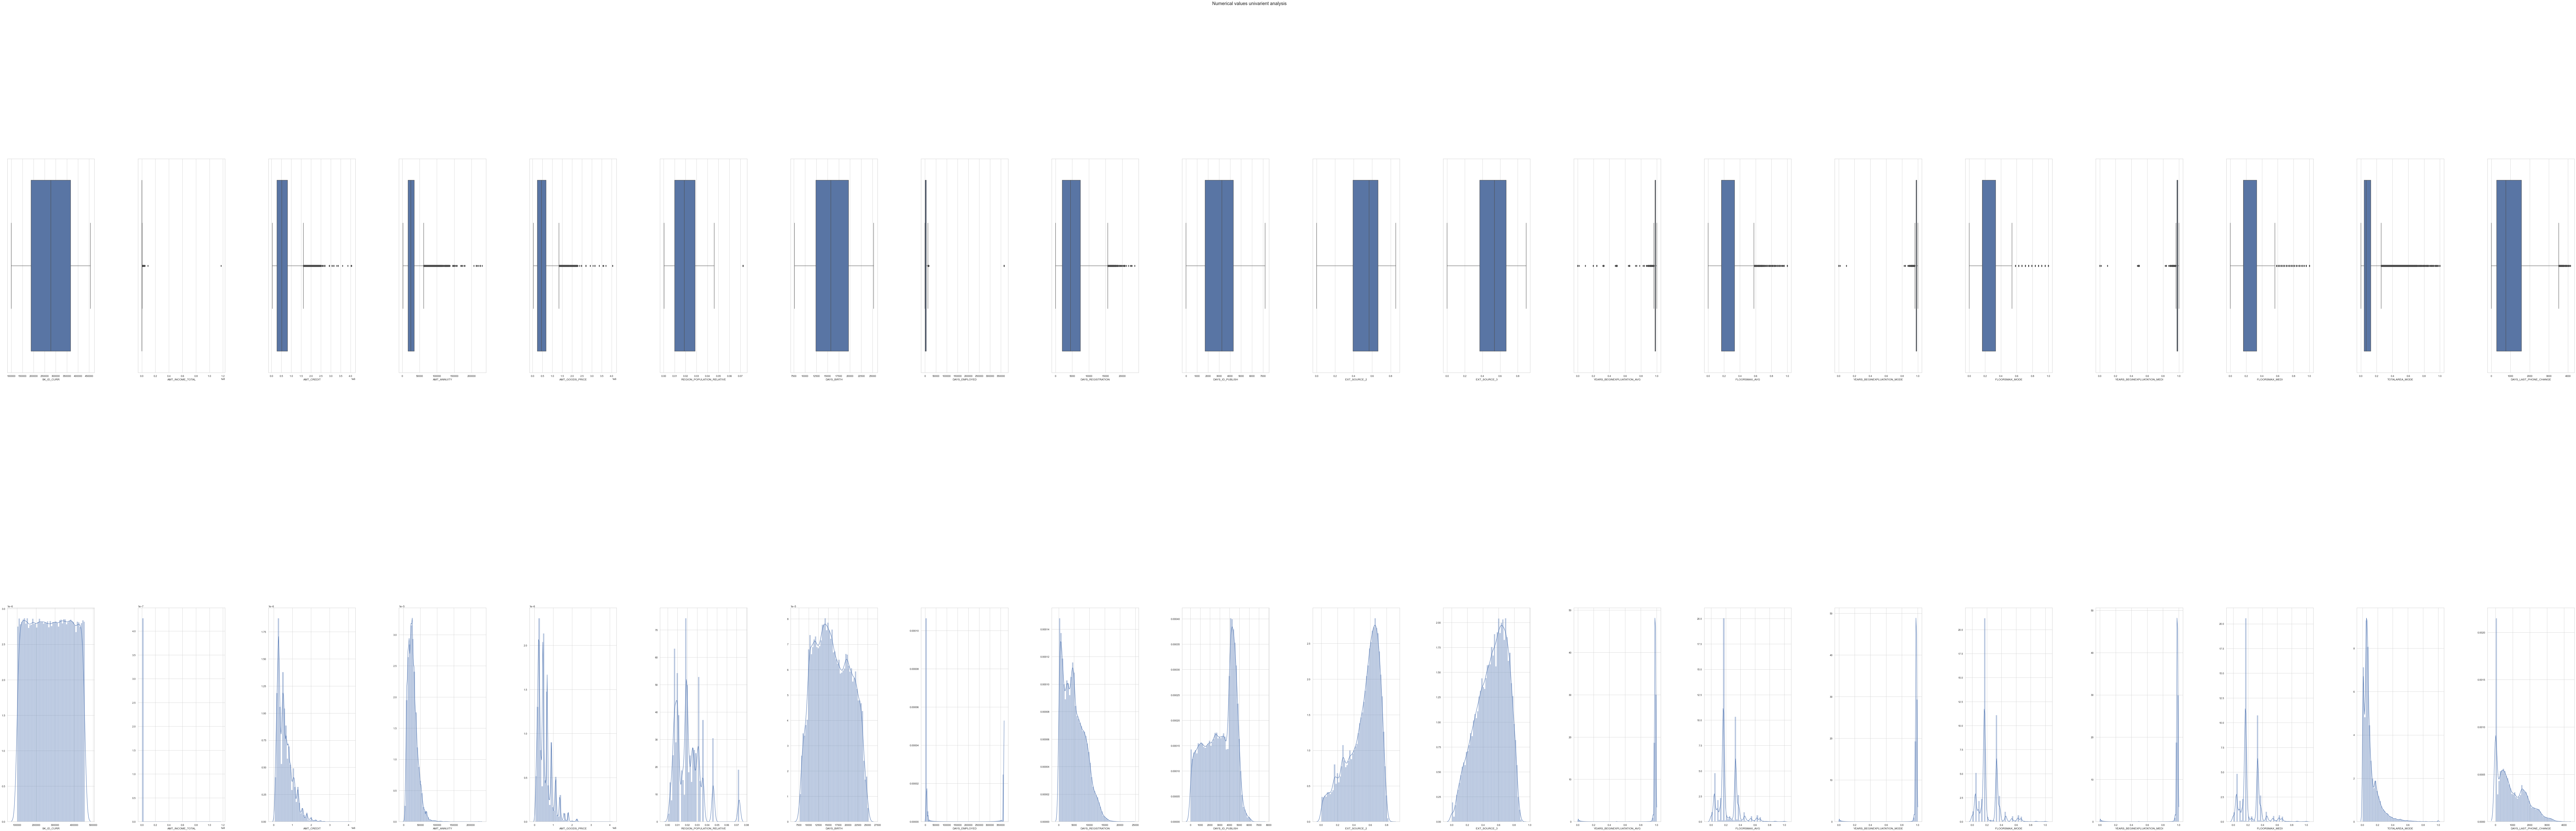

In [14]:
fig, axes = plt.subplots(figsize=(200,50), ncols=20, nrows=2)
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  1.1    # the amount of height reserved for white space between subplots
)
count=0
plt.suptitle("Numerical values univarient analysis", y = 1.09, fontsize=20)
for feature in application_data.columns: 
    if application_data[feature].dtype != 'object': 
        sns.boxplot(x=application_data[feature].dropna(),ax=axes[0][count])
        sns.distplot(application_data[feature].dropna(),ax=axes[1][count])
        count=count+1
plt.show()

### outlier presence in the numerical veriable
* AMT_INCOME_TOTAL has got some
* AMT_ANNUITY has got some
* AMT_GOODS_PRICE has got some
* REGION_POPULATION_RELATIVE has got one
* DAYS_REGISTRATION has got some
* YEARS_BEGINEXPOPULATION_AVG has got some
* FLOOR_MAXAVG has got some
* YEARS_BEGINEXPOPULATION_MODE has got some
* FLOOR_MAX_MODE has got few
* YEARS_BEGINEXPOPULATION_MEDI has got some
* FLOOR_MAX_MODE has got few
* TOTALAREA_MODE has got some
* DAYS_LAST_PHONE_CHANGE has got some

In [15]:
# TARGET value distribution is unbalanced
100*application_data.TARGET.value_counts(normalize = True)

0    91.988553
1     8.011447
Name: TARGET, dtype: float64

### plot the figure of Numerical values analysis with TARGET value 0 and 1

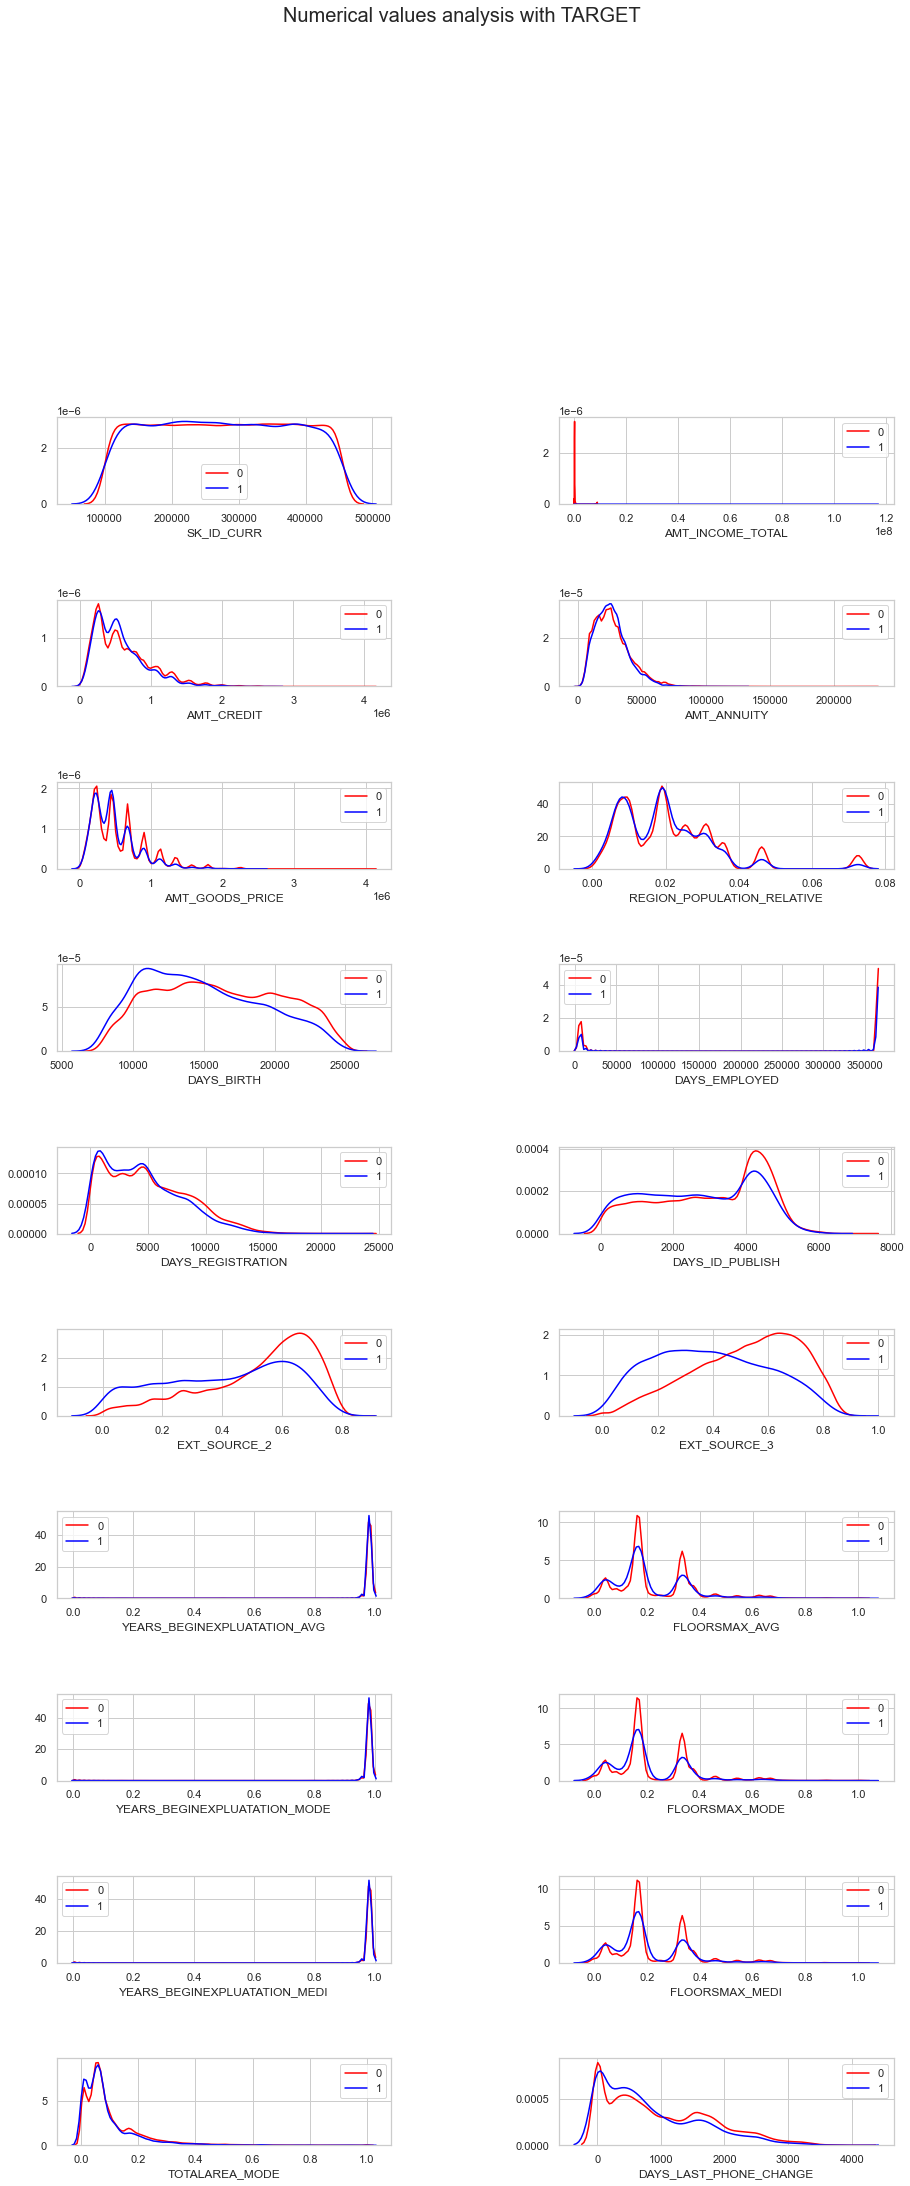

In [16]:
plt.figure(figsize = (15, 30))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  1.1    # the amount of height reserved for white space between subplots
)
plt.suptitle("Numerical values analysis with TARGET", y = 1.09, fontsize=20)
for feature in application_data.columns: 
    if application_data[feature].dtype != 'object': 
        plt.subplot(10, 2, count+1)
        sns.distplot(application_data[application_data['TARGET']==0][feature].dropna(),hist = False, label = "0", color = 'red')
        sns.distplot(application_data[application_data['TARGET']==1][feature].dropna(),hist = False, label = "1", color = 'blue')
        count=count+1
plt.show()

* for DATE_BIRTH and EXT_SOURCE_2 there are some disparity in the distribution.
* for AMOUNT_INCOME and EXT_SOURCE_3 the distribution is totaly different.
* for all other numerical column the distribution is more or less same

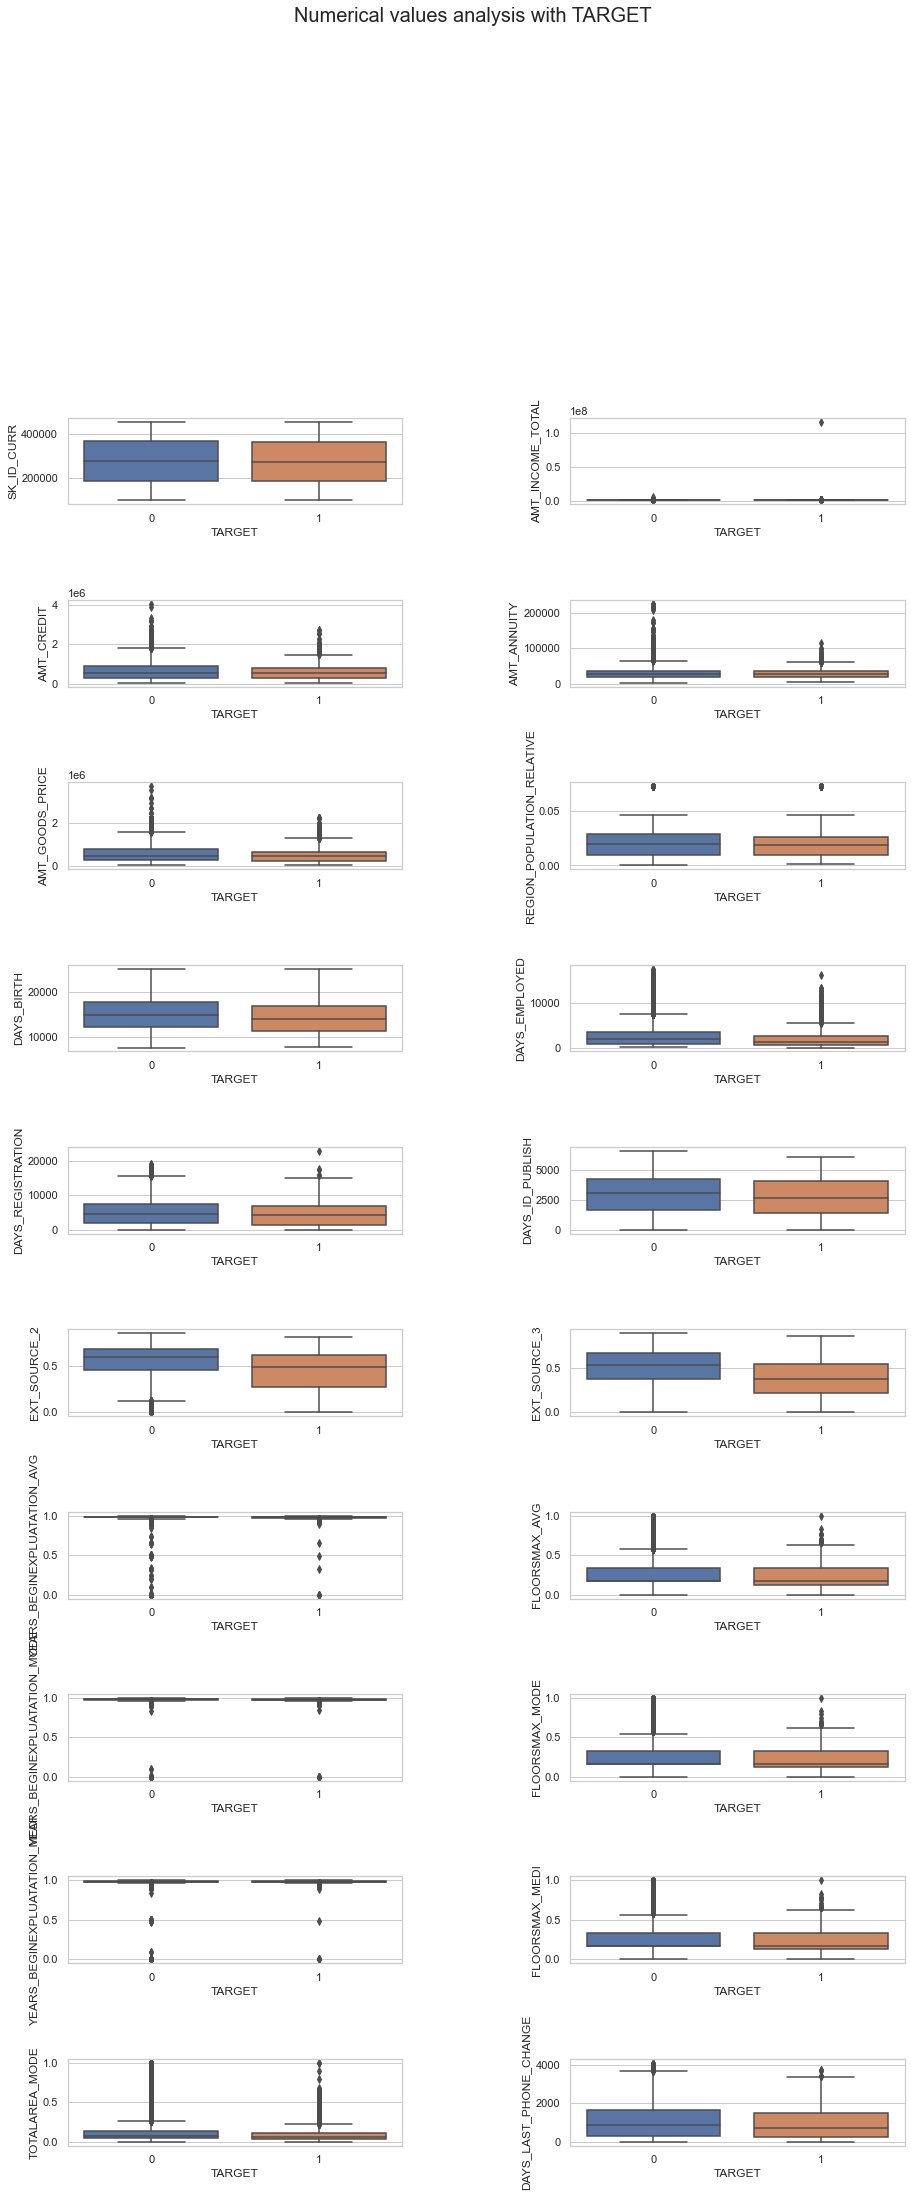

In [17]:
plt.figure(figsize = (15, 30))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  1.1    # the amount of height reserved for white space between subplots
)
plt.suptitle("Numerical values analysis with TARGET", y = 1.09, fontsize=20)
for feature in application_data.columns: 
    if application_data[feature].dtype != 'object': 
        plt.subplot(10, 2, count+1)
        sns.boxplot(x = 'TARGET', y = feature, data = application_data.dropna())
        count=count+1
plt.show()

### the above inferance what we made box plot satisfy the same

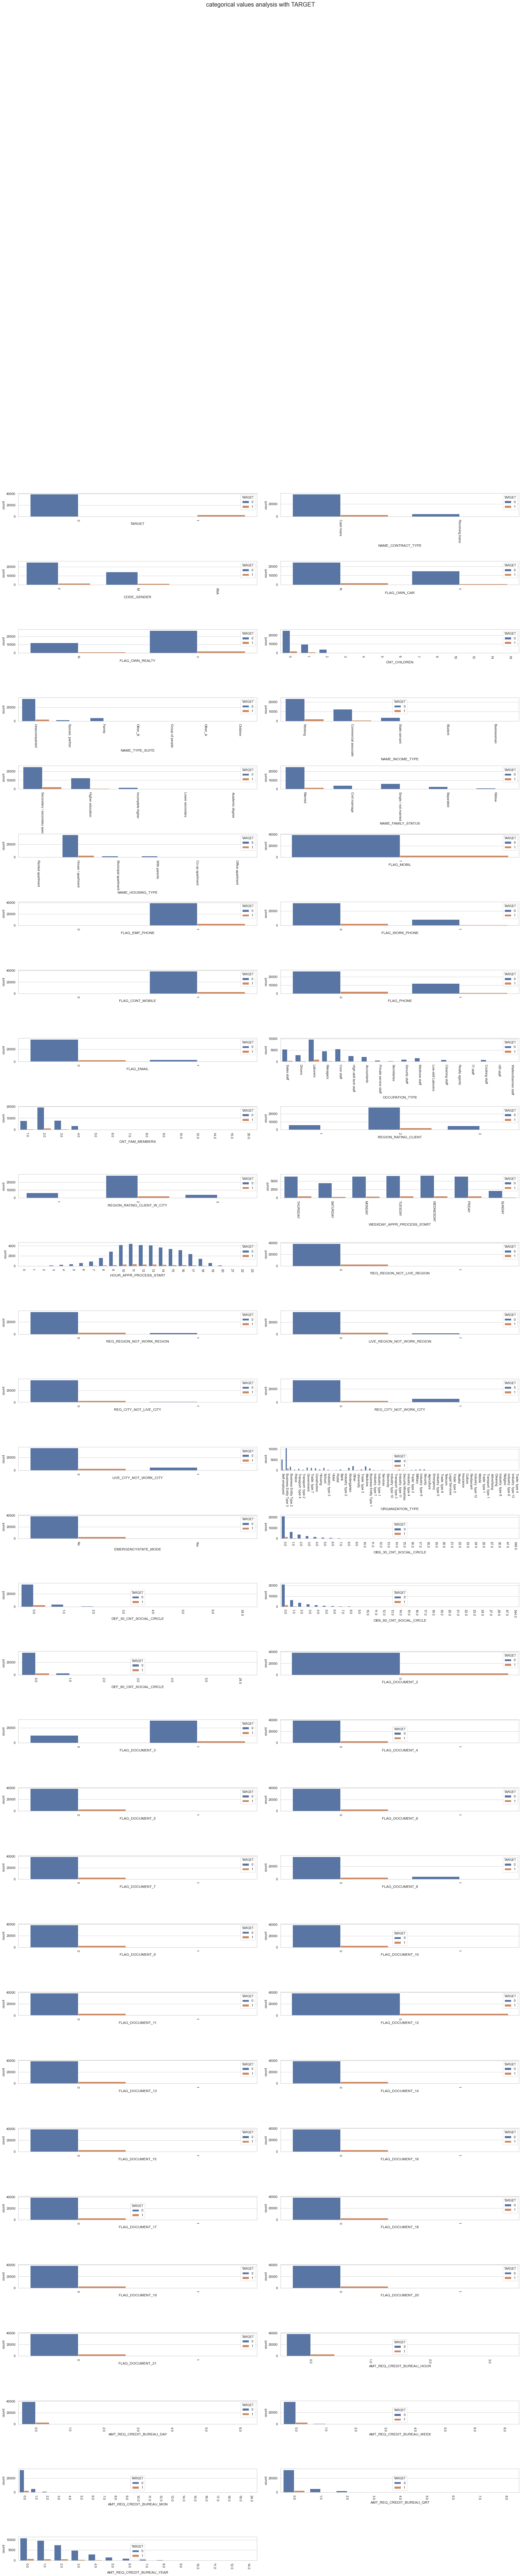

In [18]:
plt.figure(figsize = (30, 120))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .1,    # the amount of width reserved for blank space between subplots
    hspace =  1.9    # the amount of height reserved for white space between subplots
)
plt.suptitle("categorical values analysis with TARGET", y = 1.09, fontsize=20)
for feature in application_data.columns: 
    if application_data[feature].dtype == 'object': 
        plt.subplot(31, 2, count+1)
        sns.countplot(x = feature, hue= 'TARGET', data = application_data.dropna())
        plt.xticks(rotation=-90)
        count=count+1
plt.show()

### categorical value impact on TARGET veriable 0 and 1
* NAME_CONTRACT_TYPE REVOLVING LOAN have no issue paying previously
* NAME_TYPE_SUITE family and spouse's patner no issue paying previously
* NAME_INCOME_TYPE state servent no issue paying previously
* NAME_EDUCATION_TYPE higher education incomplete higher no issue paying previously
* NAME_FAMILY_STATUS except married no issue paying previously
* NAME_HOUSING_TYPE house/appartment no issue paying previously
* OCCUPATION_TYPE issue paying is laborers
* REGION_RATING_CLIENT_W_CITY 2 has got most issue paying

In [19]:
#calculate the correlation coefficint of application data
corr=application_data[application_data['TARGET']==0].corr()

In [20]:
corr = application_data[application_data['TARGET']==0].corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).reset_index().head(20)

,index,Var1,Var2,Correlation
0,353,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
1,355,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
2,332,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
3,82,AMT_GOODS_PRICE,AMT_CREDIT,0.99
4,313,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
5,334,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.97
6,292,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
7,83,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
8,62,AMT_ANNUITY,AMT_CREDIT,0.77
9,146,DAYS_EMPLOYED,DAYS_BIRTH,0.63


### corelation matrix for inter dependency between the feature for target value 0

In [21]:
corr = application_data[application_data['TARGET']==1].corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).reset_index().head(20)

,index,Var1,Var2,Correlation
0,353,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
1,313,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
2,355,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
3,332,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
4,82,AMT_GOODS_PRICE,AMT_CREDIT,0.98
5,292,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
6,334,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.97
7,62,AMT_ANNUITY,AMT_CREDIT,0.75
8,83,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
9,373,TOTALAREA_MODE,FLOORSMAX_AVG,0.64


### corelation matrix for inter dependency between the feature for target value 1

### changing the DAYS_REGISTRATION and DAYS_EMPLOYED column to categorical column through binning

In [22]:
application_data['DAYS_EMPLOYED'].describe()
days_employed=pd.cut(application_data.DAYS_EMPLOYED,bins=[3,2231,365243],labels=['high','low'])
application_data['DAYS_EMPLOYED_C']=days_employed
application_data['DAYS_EMPLOYED_C']

0         high
1         high
2         high
3          low
4         high
          ... 
153750     low
153751     low
153752    high
153753     low
153754     low
Name: DAYS_EMPLOYED_C, Length: 153755, dtype: category
Categories (2, object): [high < low]

In [23]:
application_data['DAYS_REGISTRATION'].describe()
days_registration=pd.cut(application_data.DAYS_REGISTRATION,bins=[0,4521,23738],labels=['high','low'])
application_data['DAYS_REGISTRATION_C']=days_registration
application_data['DAYS_REGISTRATION_C']

0         high
1         high
2          low
3         high
4         high
          ... 
153750     low
153751     low
153752     low
153753     low
153754    high
Name: DAYS_REGISTRATION_C, Length: 153755, dtype: category
Categories (2, object): [high < low]

# previous application data analysis

In [24]:
#read the shape of  previous application data
pre_application.shape

(835106, 37)

In [25]:
#print the percentage of NaN in previous application data
pre_application.isnull().sum(axis=0).sort_values()/len(pre_application.index)*100

SK_ID_PREV                      0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_PAYMENT_TYPE               0.000000
AMT_APPLICATION                 0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
AMT_CREDIT                      0.000120
PRODUCT_COMBINATION             0.020357
CNT_PAYMENT                    22.304594
AMT_ANNUITY     

In [26]:
#drop the columns 'AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED' because the NaN value is more than 50 %
pre_application.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1,inplace=True)

In [27]:
#print the percentage after droping
pre_application.isnull().sum(axis=0).sort_values()/len(pre_application.index)*100

SK_ID_PREV                      0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
AMT_CREDIT                      0.000120
PRODUCT_COMBINATION             0.020357
CNT_PAYMENT                    22.304594
AMT_ANNUITY     

In [28]:
#print the previous application data type
pre_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835106 entries, 0 to 835105
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   835106 non-null  int64  
 1   SK_ID_CURR                   835106 non-null  int64  
 2   NAME_CONTRACT_TYPE           835106 non-null  object 
 3   AMT_ANNUITY                  648836 non-null  float64
 4   AMT_APPLICATION              835106 non-null  float64
 5   AMT_CREDIT                   835105 non-null  float64
 6   AMT_GOODS_PRICE              642316 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   835106 non-null  object 
 8   HOUR_APPR_PROCESS_START      835106 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  835106 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       835106 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       835106 non-null  object 
 12  NAME_CONTRACT_STATUS         835106 non-null  object 
 13 

In [29]:
#sort the previous application data unique values into decending order
pre_application.nunique().sort_values(ascending=False)

SK_ID_PREV                     835106
SK_ID_CURR                     285659
AMT_ANNUITY                    247135
AMT_CREDIT                      69485
AMT_GOODS_PRICE                 68033
AMT_APPLICATION                 68033
DAYS_LAST_DUE_1ST_VERSION        4587
DAYS_DECISION                    2922
DAYS_FIRST_DUE                   2892
DAYS_LAST_DUE                    2857
DAYS_TERMINATION                 2810
DAYS_FIRST_DRAWING               2682
SELLERPLACE_AREA                 1984
CNT_PAYMENT                        46
NAME_GOODS_CATEGORY                26
NAME_CASH_LOAN_PURPOSE             25
HOUR_APPR_PROCESS_START            24
PRODUCT_COMBINATION                17
NAME_SELLER_INDUSTRY               11
CODE_REJECT_REASON                  9
CHANNEL_TYPE                        8
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_PORTFOLIO                      5
NAME_YIELD_GROUP                    5
NAME_CONTRACT_STATUS                4
NAME_PAYMENT

In [30]:
#making the columes object type for which the uniqueness is less
list_Objects=['CNT_PAYMENT','NAME_GOODS_CATEGORY','NAME_CASH_LOAN_PURPOSE','HOUR_APPR_PROCESS_START','PRODUCT_COMBINATION','NAME_SELLER_INDUSTRY','CODE_REJECT_REASON','CHANNEL_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE','NAME_PORTFOLIO','NAME_YIELD_GROUP','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE','NAME_PRODUCT_TYPE','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','NFLAG_INSURED_ON_APPROVAL']
for feature in list_Objects:
    pre_application.loc[:, feature] = pre_application.loc[:, feature].astype(object)

In [31]:
#print the data type of previous application
pre_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835106 entries, 0 to 835105
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   835106 non-null  int64  
 1   SK_ID_CURR                   835106 non-null  int64  
 2   NAME_CONTRACT_TYPE           835106 non-null  object 
 3   AMT_ANNUITY                  648836 non-null  float64
 4   AMT_APPLICATION              835106 non-null  float64
 5   AMT_CREDIT                   835105 non-null  float64
 6   AMT_GOODS_PRICE              642316 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   835106 non-null  object 
 8   HOUR_APPR_PROCESS_START      835106 non-null  object 
 9   FLAG_LAST_APPL_PER_CONTRACT  835106 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       835106 non-null  object 
 11  NAME_CASH_LOAN_PURPOSE       835106 non-null  object 
 12  NAME_CONTRACT_STATUS         835106 non-null  object 
 13 

In [32]:
# making the numerical data type correction whether it is int or float  and takig absolute value
for feature in pre_application.columns: 
    if pre_application[feature].dtype != 'object': 
        pre_application.loc[:, feature] = pd.to_numeric(pre_application[feature], errors = 'coerce')
        pre_application[feature] = pre_application[feature].abs()
pre_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835106 entries, 0 to 835105
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   835106 non-null  int64  
 1   SK_ID_CURR                   835106 non-null  int64  
 2   NAME_CONTRACT_TYPE           835106 non-null  object 
 3   AMT_ANNUITY                  648836 non-null  float64
 4   AMT_APPLICATION              835106 non-null  float64
 5   AMT_CREDIT                   835105 non-null  float64
 6   AMT_GOODS_PRICE              642316 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   835106 non-null  object 
 8   HOUR_APPR_PROCESS_START      835106 non-null  object 
 9   FLAG_LAST_APPL_PER_CONTRACT  835106 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       835106 non-null  object 
 11  NAME_CASH_LOAN_PURPOSE       835106 non-null  object 
 12  NAME_CONTRACT_STATUS         835106 non-null  object 
 13 

In [33]:
#plot the figure of Numerical values univarient analysis of previous application data

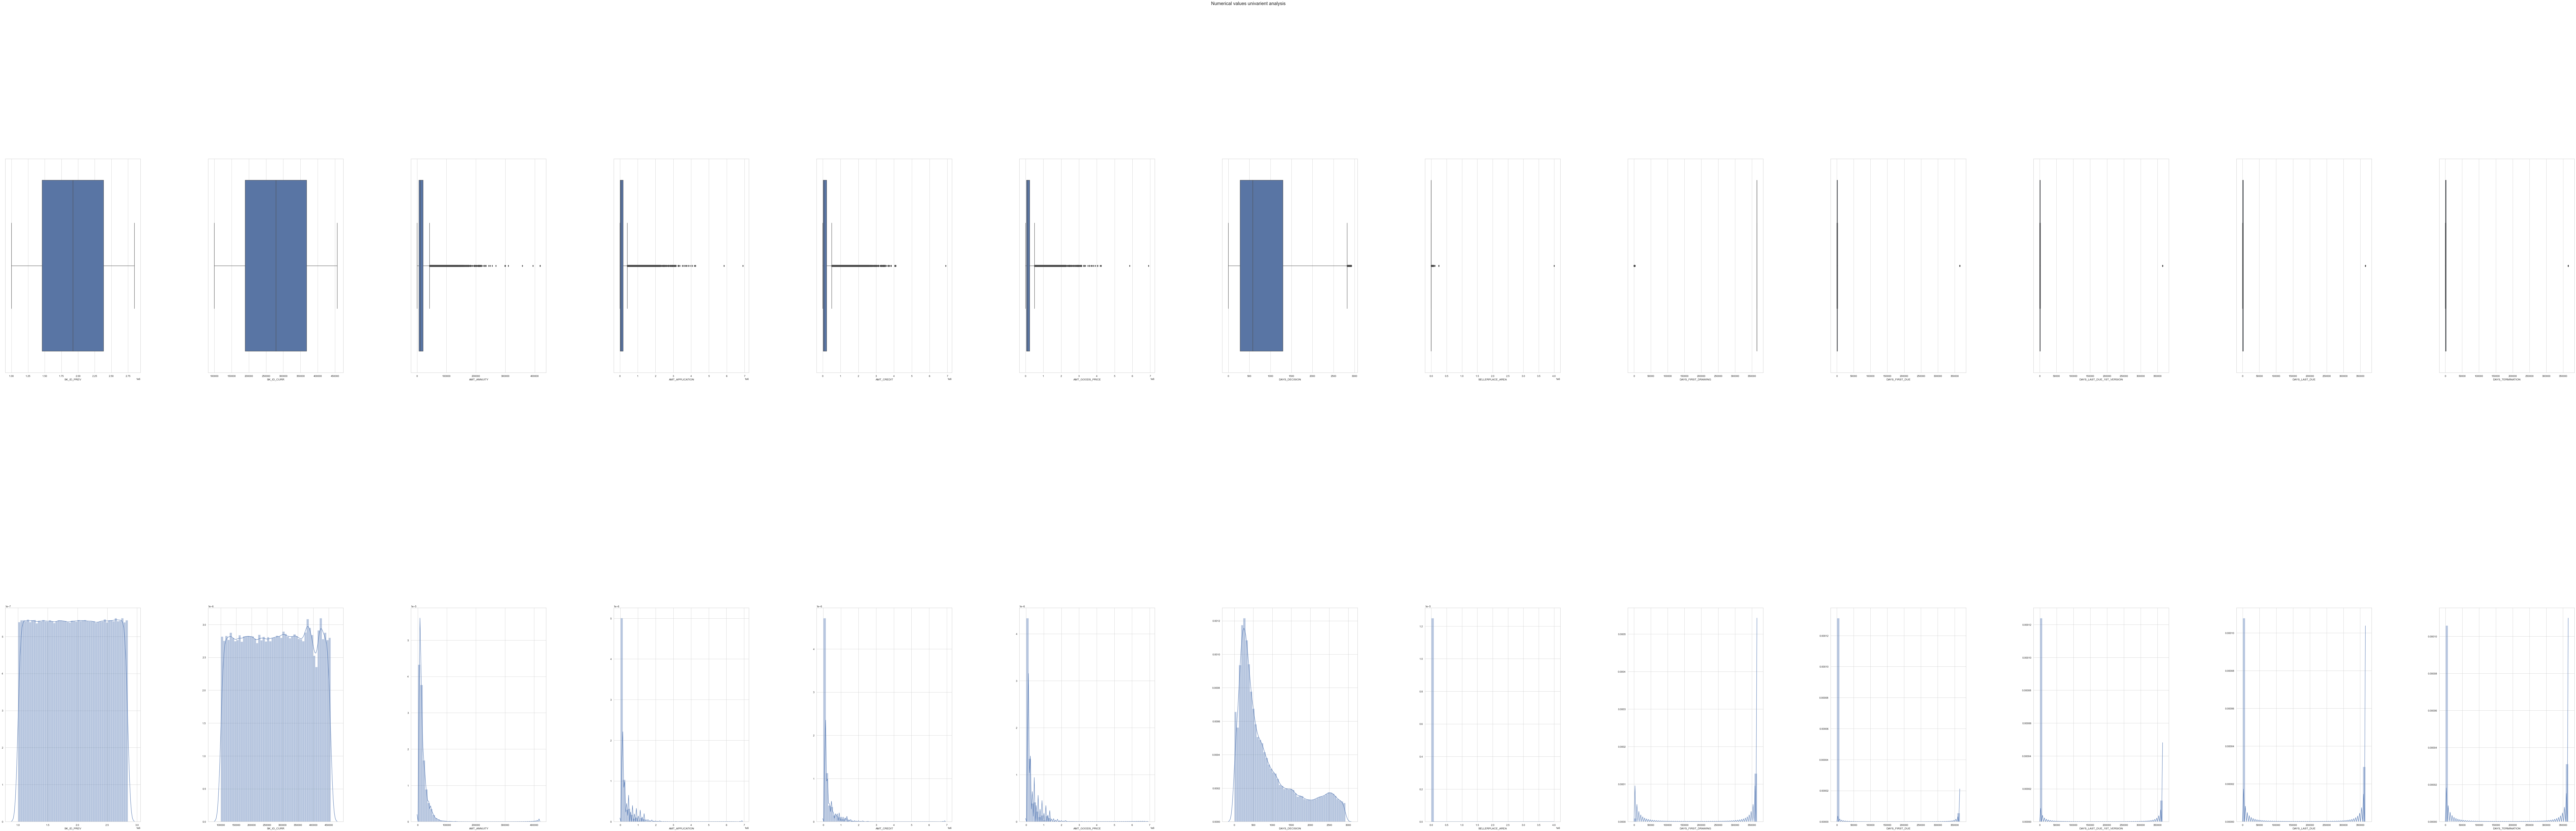

In [34]:
fig, axes = plt.subplots(figsize=(200,50), ncols=13, nrows=2)
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  1.1    # the amount of height reserved for white space between subplots
)
count=0
plt.suptitle("Numerical values univarient analysis", y = 1.09, fontsize=20)
for feature in pre_application.columns: 
    if pre_application[feature].dtype != 'object': 
        sns.boxplot(x=pre_application[feature].dropna(),ax=axes[0][count])
        sns.distplot(pre_application[feature].dropna(),ax=axes[1][count])
        count=count+1
plt.show()

### all the feature have outliers

In [35]:
pre_application.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

### plot the numerical values with name-contact- status

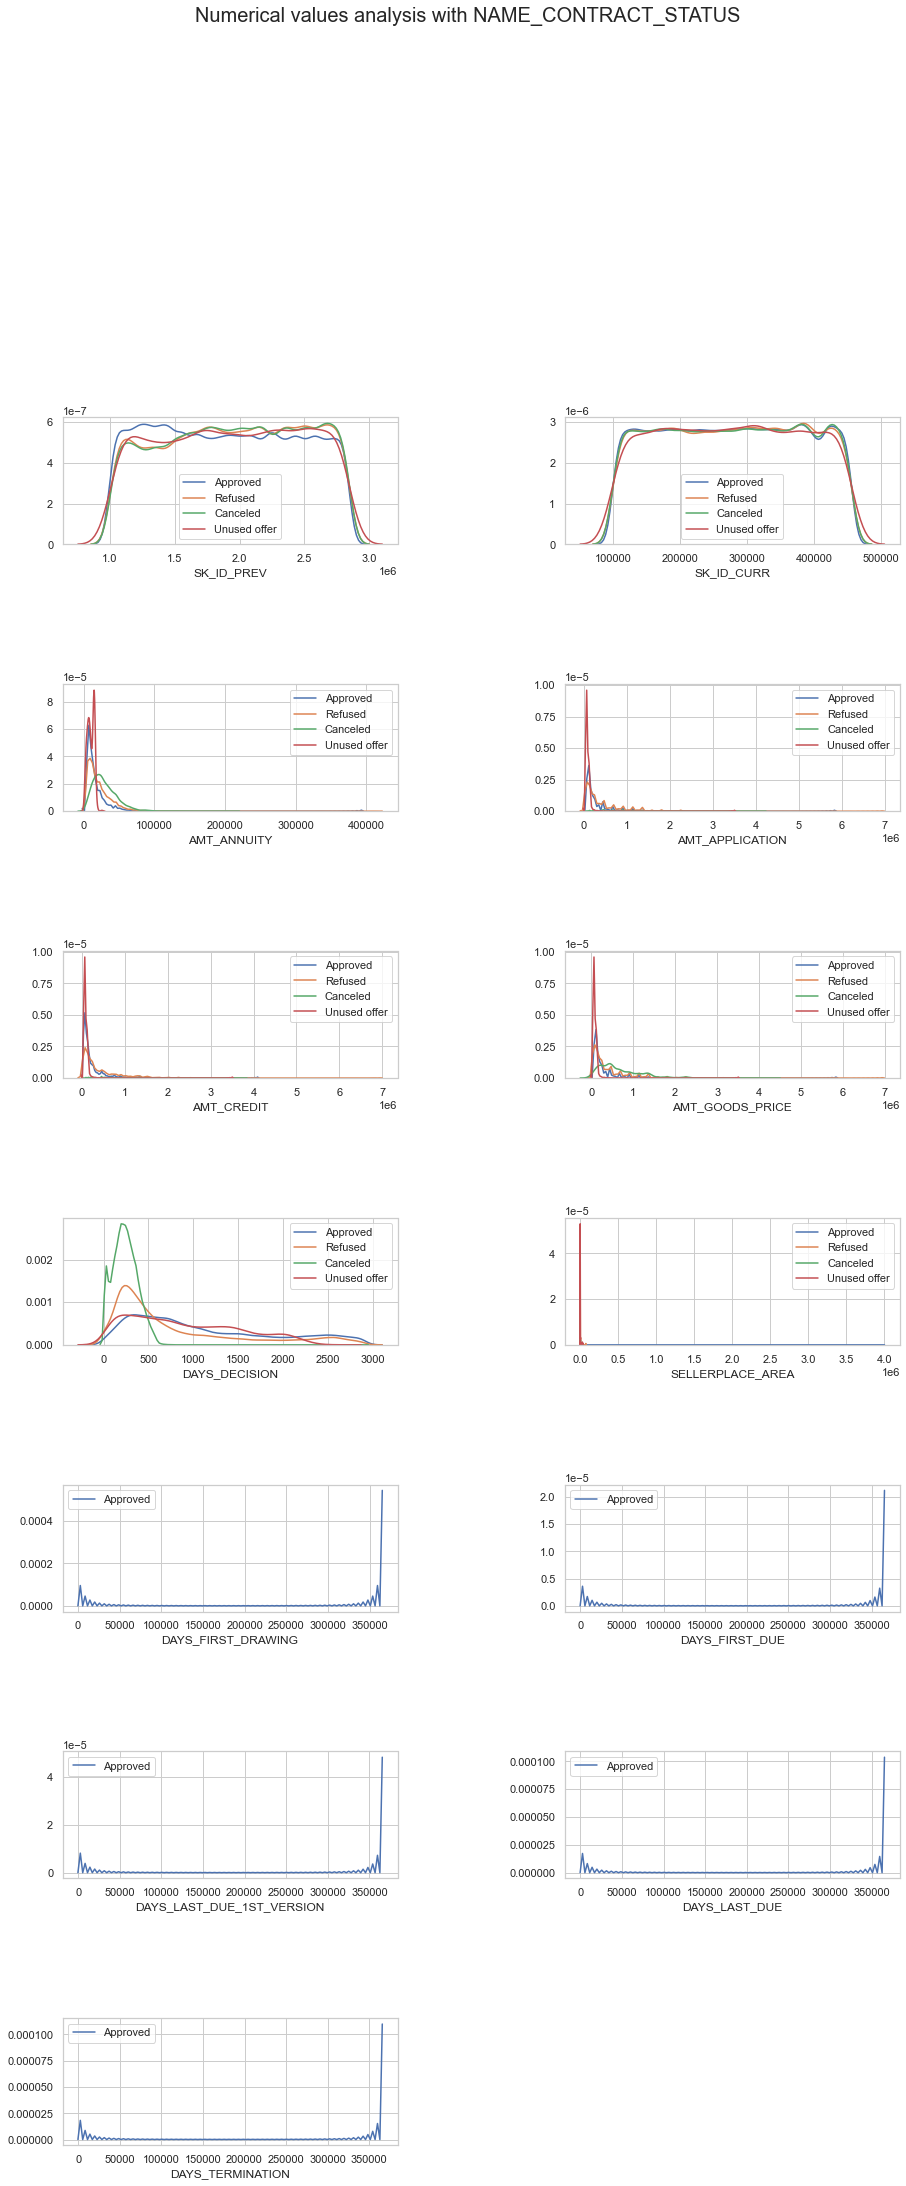

In [36]:
plt.figure(figsize = (15, 30))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  1.1    # the amount of height reserved for white space between subplots
)
plt.suptitle("Numerical values analysis with NAME_CONTRACT_STATUS", y = 1.09, fontsize=20)
for feature in pre_application.columns: 
    if pre_application[feature].dtype != 'object': 
        plt.subplot(7, 2, count+1)
        sns.distplot(pre_application[pre_application['NAME_CONTRACT_STATUS']=='Approved'][feature].dropna(),hist = False, label = "Approved")
        sns.distplot(pre_application[pre_application['NAME_CONTRACT_STATUS']=='Refused'][feature].dropna(),hist = False, label = "Refused")
        sns.distplot(pre_application[pre_application['NAME_CONTRACT_STATUS']=='Canceled'][feature].dropna(),hist = False, label = "Canceled")
        sns.distplot(pre_application[pre_application['NAME_CONTRACT_STATUS']=='Unused offer'][feature].dropna(),hist = False, label = "Unused offer")
        count=count+1
plt.show()

* AMT_ANNUITY 0 TO 100000 ALL THE CHANGES
* AMT_APPLICATION 0-1 ALL THE CHANGES
* AMT_CREDIT 0-1 ALL THE THE CHANGES
* AMT_GOODS_PRICE 0-2 ALL THE CHANGES
* DAYS_DECISION between 0-500 all rejected

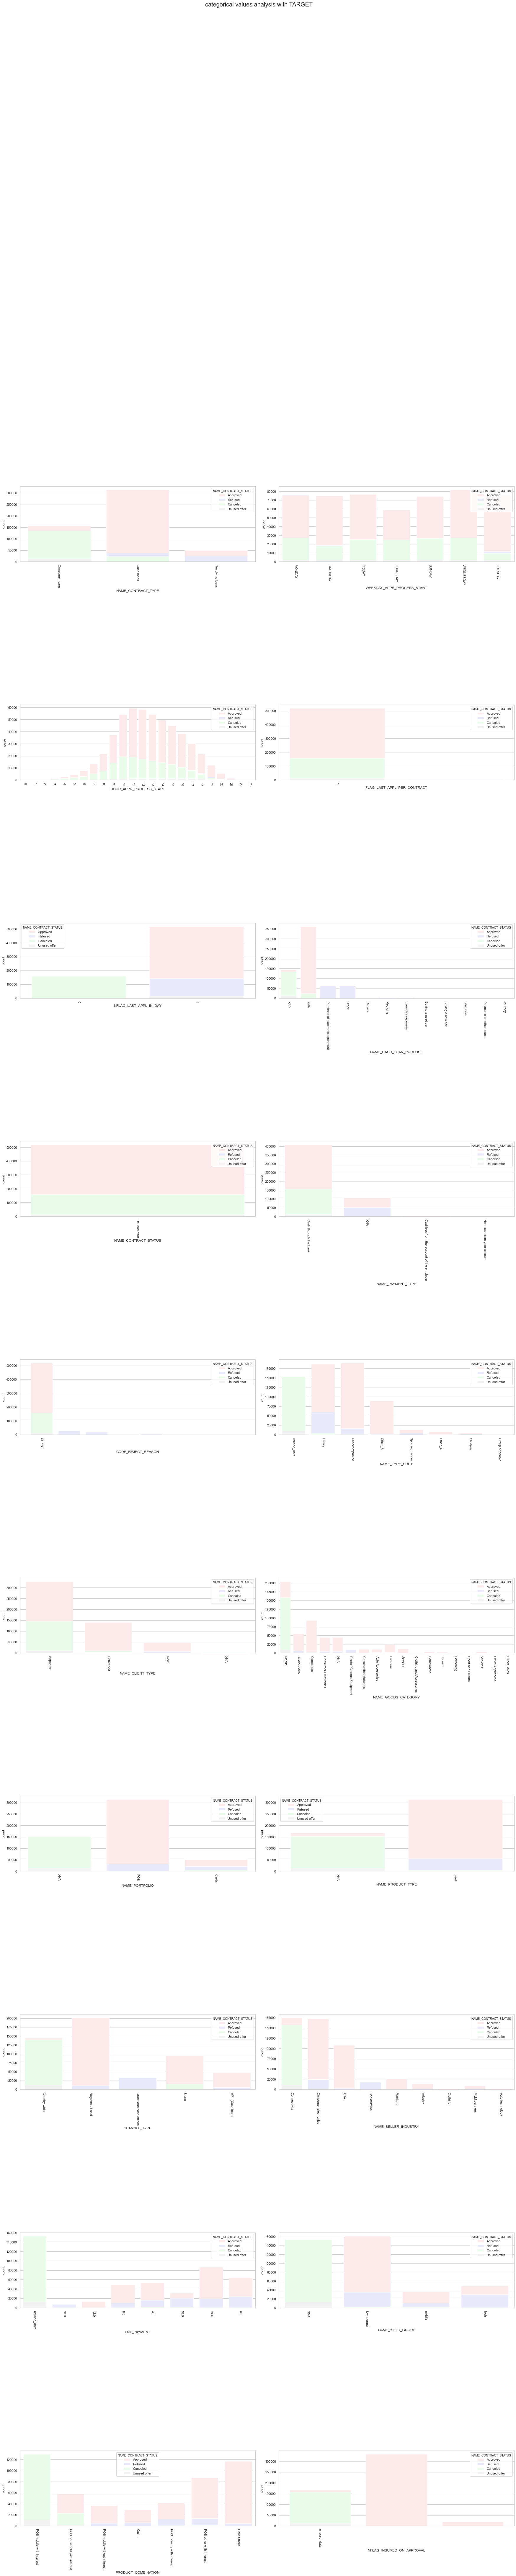

In [37]:
app_pre_application=pre_application[pre_application['NAME_CONTRACT_STATUS']=='Approved']
ref_pre_application=pre_application[pre_application['NAME_CONTRACT_STATUS']=='Refused']
can_pre_application=pre_application[pre_application['NAME_CONTRACT_STATUS']=='Canceled']
un_pre_application=pre_application[pre_application['NAME_CONTRACT_STATUS']=='Unused offer']
plt.figure(figsize = (30, 120))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .1,    # the amount of width reserved for blank space between subplots
    hspace =  1.9    # the amount of height reserved for white space between subplots
)
plt.suptitle("categorical values analysis with TARGET", y = 1.09, fontsize=20)
for feature in pre_application.columns: 
    if pre_application[feature].dtype == 'object': 
        plt.subplot(10, 2, count+1)
        sns.countplot(x = feature, hue= 'NAME_CONTRACT_STATUS', data = app_pre_application.fillna('unused_data'),color='red')
        sns.countplot(x = feature, hue= 'NAME_CONTRACT_STATUS', data = ref_pre_application.fillna('unused_data'),color='blue')
        sns.countplot(x = feature, hue= 'NAME_CONTRACT_STATUS', data = can_pre_application.fillna('unused_data'),color='green')
        sns.countplot(x = feature, hue= 'NAME_CONTRACT_STATUS', data = un_pre_application.fillna('unused_data'),color='black')
        plt.xticks(rotation=-90)
        count=count+1
plt.show()

### categorical veriable impact on NAME_CONTRACT_STATUS
* for NAME_CONTRACY_TYPE cash loans have accept refusued and canceled
* for WEEKDAY_APPR_PROCESS_START most of them have got approve and canceled
* for FLAG_LAST_APPL_PER_CONTRACT for only yes there is accept and canceled
* for NFLAG_LAST_APPL_IN_DAY for 0 only cancle is avaliable
* for NAME_PAYMENT_TYPE cash through the bank has only approve and canceled and XNA has approve and refused

In [38]:
merged_aplication_to_previous = pd.merge(left=pre_application, right=application_data, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
df1=merged_aplication_to_previous.groupby('NAME_CONTRACT_STATUS')['TARGET'].agg('count').to_frame().reset_index()
df1

,NAME_CONTRACT_STATUS,TARGET
0,Approved,221578
1,Canceled,64920
2,Refused,61245
3,Unused offer,5702


In [39]:
df2=merged_aplication_to_previous[merged_aplication_to_previous['TARGET']==1].groupby('NAME_CONTRACT_STATUS')['TARGET'].agg('count').to_frame().reset_index()

In [40]:
df2['FREQUENCY']=df2['TARGET']/df1['TARGET']*100
df2

,NAME_CONTRACT_STATUS,TARGET,FREQUENCY
0,Approved,16539,7.464189
1,Canceled,5874,9.048059
2,Refused,7180,11.723406
3,Unused offer,449,7.874430


In [41]:
df3=merged_aplication_to_previous[merged_aplication_to_previous['TARGET']==0].groupby('NAME_CONTRACT_STATUS')['TARGET'].agg('count').to_frame().reset_index()

In [42]:
df3['FREQUENCY']=df3['TARGET']/df1['TARGET']*100
df3

,NAME_CONTRACT_STATUS,TARGET,FREQUENCY
0,Approved,205039,92.535811
1,Canceled,59046,90.951941
2,Refused,54065,88.276594
3,Unused offer,5253,92.125570


In [43]:
df1['1_FRQUENCY']=df2['FREQUENCY']
df1['0_FRQUENCY']=df3['FREQUENCY']
df1

,NAME_CONTRACT_STATUS,TARGET,1_FRQUENCY,0_FRQUENCY
0,Approved,221578,7.464189,92.535811
1,Canceled,64920,9.048059,90.951941
2,Refused,61245,11.723406,88.276594
3,Unused offer,5702,7.874430,92.125570


# REFUSED previously has got the highest frequency of paying